In [1]:
import networkx as nx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from networkx.algorithms.community import girvan_newman
from community import best_partition

aarhus = ['aarhus_1.txt', 'aarhus_2.txt', 'aarhus_3.txt', 'aarhus_4.txt', 'aarhus_5.txt']

euair = ['euair_1.txt', 'euair_10.txt', 'euair_11.txt', 'euair_12.txt', 'euair_13.txt', 'euair_14.txt', 'euair_15.txt', 'euair_16.txt', 'euair_17.txt', 'euair_18.txt', 'euair_19.txt', 'euair_2.txt', 'euair_20.txt', 'euair_21.txt', 'euair_22.txt', 'euair_23.txt', 'euair_24.txt', 'euair_25.txt', 'euair_26.txt', 'euair_27.txt', 'euair_28.txt', 'euair_29.txt', 'euair_3.txt', 'euair_30.txt', 'euair_31.txt', 'euair_32.txt', 'euair_33.txt', 'euair_34.txt', 'euair_35.txt', 'euair_36.txt', 'euair_37.txt', 'euair_4.txt', 'euair_5.txt', 'euair_6.txt', 'euair_7.txt', 'euair_8.txt', 'euair_9.txt']

krackhardt = ['krackhardt_1.txt', 'krackhardt_2.txt', 'krackhardt_3.txt']

padgett = ['padgett_1.txt', 'padgett_2.txt']

_4layers = ['output_4layer_1.txt', 'output_4layer_2.txt', 'output_4layer_3.txt', 'output_4layer_4.txt']

_3layers = ['output_3layer_1.txt', 'output_3layer_2.txt', 'output_3layer_3.txt']

_mlfr_2layer = ['mLFR/2layer_mlfr_Layer1_.txt', 'mLFR/2layer_mlfr_Layer2_.txt']

_mlfr_3layer = ['mLFR/3layer_mlfr_Layer1_.txt', 'mLFR/3layer_mlfr_Layer2_.txt', 'mLFR/3layer_mlfr_Layer3_.txt']

In [2]:
def getColors():
  return np.array([
          [166,206,227],
          [31,120,180],
          [178,223,138],
          [51,160,44],
          [251,154,153],
          [227,26,28],
          [253,191,111],
          [255,127,0],
          [202,178,214],
          [106,61,154],
          [255,255,153],
          [177,89,40]
        ])/255

In [14]:
def drawPartition(fileName):  
  A = pd.read_csv(fileName, sep=" ", header=None)
  G = nx.from_numpy_matrix(np.array(A))

  partition = best_partition(G)

  size = len(set(partition.values()))
  
  colors = getColors()
  layouts = {nx.spring_layout : 'spring', 
             nx.circular_layout : 'x_circular', 
             nx.kamada_kawai_layout : 'kamada_kawai'}
  
  for fun in layouts:
    plt.clf()
    outfile = fileName.split('.')[0] + '_best_partition_' + layouts[fun] + '.png'
    
    pos = fun(G)
    count = 0
    for com in set(partition.values()) :
        toDraw = True
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        labels = dict()
        for node in list_nodes:
          labels[node] = node+1
        node_colors = np.zeros((len(list_nodes), 3))
  #       node_colors[:] = np.array([1-colors[count], colors[count], colors[count]])
        if len(list_nodes) <= 3:
          node_colors[:] = [1, 1, 1]
          if fun != nx.circular_layout:
            toDraw = False
        else:
          try:
            node_colors[:] = colors[count]
            count += 1
          except:
            node_colors[:] = [1, 1, 1]
        if toDraw:
          nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color=node_colors)
          nx.draw_networkx_labels(G, pos, labels, font_size = 3)
    nx.draw_networkx_edges(G, pos, width=0.2)
    plt.savefig(outfile, dpi=300)

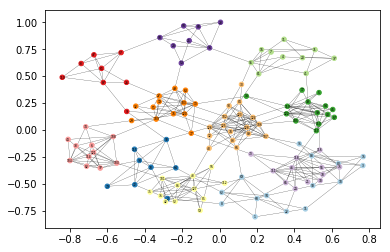

In [16]:
for fileName in _mlfr_2layer:
  drawPartition(fileName)

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


3
3
3
4
4
4
4
4
4
Done


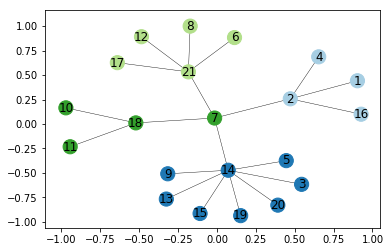

In [5]:
fileNames = ['krackhardt_1.txt', 'krackhardt_2.txt', 'krackhardt_3.txt']
for fileName in fileNames:
  drawPartition(fileName)
print('Done')

4
4
4
2
2
2
Done


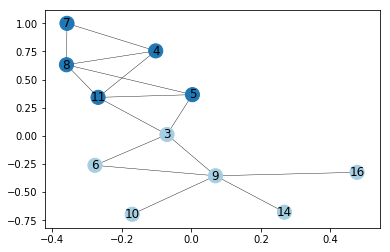

In [6]:
fileNames = ['padgett_1.txt', 'padgett_2.txt']
for fileName in fileNames:
  drawPartition(fileName)
print('Done')

Done


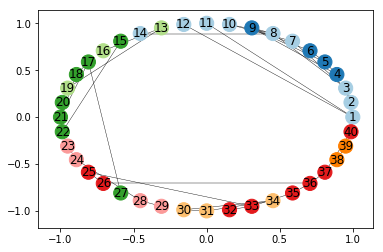

In [60]:
fileNames = ['output_3layer_1.txt', 'output_3layer_2.txt', 'output_3layer_3.txt',
             'output_4layer_1.txt', 'output_4layer_2.txt', 'output_4layer_3.txt', 'output_4layer_4.txt']
for fileName in fileNames:
  drawPartition(fileName)
print('Done')

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


6
6
6


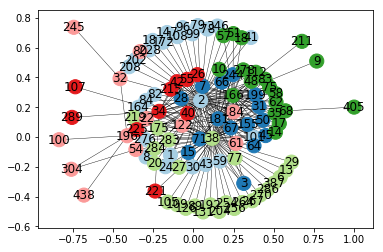

In [4]:
drawPartition('euair_1.txt')